In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('./Data/diem_thi_thpt_2024.csv', dtype={'sbd': str})
df

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,01000001,8.4,6.75,8.0,6.00,5.25,5.0,NaN,NaN,NaN,N1
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1
...,...,...,...,...,...,...,...,...,...,...,...
1061600,64007282,4.2,6.00,3.0,NaN,NaN,NaN,5.25,6.25,7.50,N1
1061601,64007283,5.2,6.00,3.6,NaN,NaN,NaN,6.25,5.75,7.75,N1
1061602,64007284,7.2,8.00,7.0,6.25,7.00,8.0,NaN,NaN,NaN,N1
1061603,64007285,5.2,5.25,4.4,NaN,NaN,NaN,4.75,6.50,8.75,N1


# Overview

In [124]:
students = df['sbd'].count()
print(students)

1061605


In [125]:
# Định nghĩa các môn học và tiêu đề
subjects = df.columns[1:-1].tolist()
titles = ["Toán", "Ngữ Văn", "Ngoai Ngữ", "Vật Lý", "Hóa Học", "Sinh Học", "Lịch Sử", "Địa Lý", "GDCD"]
colors = ['skyblue', 'red', 'green', 'yellow', 'purple', 'orange', 'pink', 'brown', 'grey']

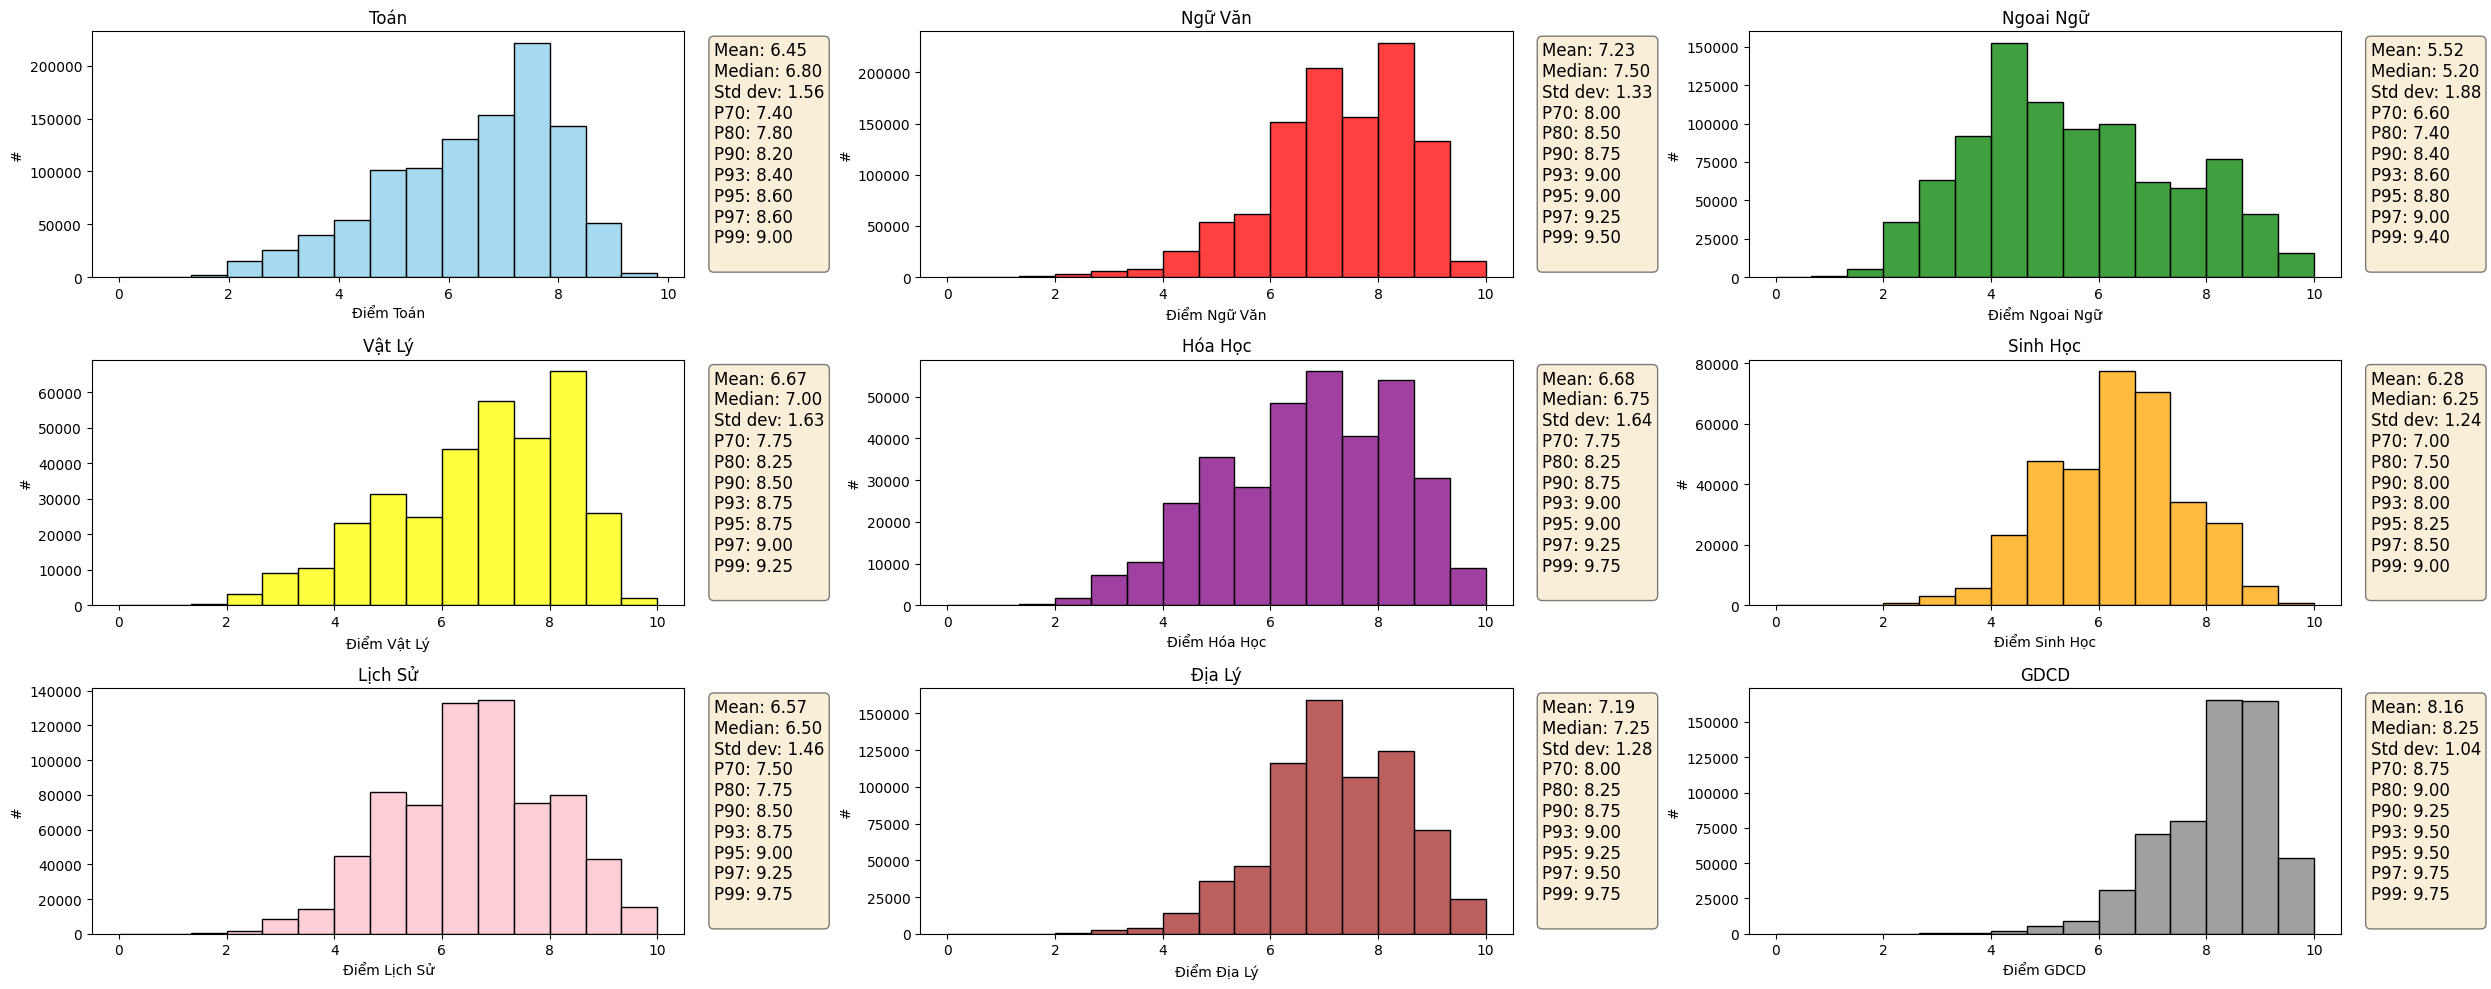

In [126]:
# Tạo từng histogram cho tất cả các môn học và Hiện thị thông tin thống kê trên biểu đồ
fig, ax = plt.subplots(3, 3, figsize=(25, 10))
ax = ax.ravel()

for i in range(9):
  
    sns.histplot(df[subjects[i]].dropna(), kde=False, ax=ax[i], edgecolor='black', color=colors[i], bins=15)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel(f'Điểm {titles[i]}')
    ax[i].set_ylabel('#')

    data = df[subjects[i]].dropna()
    mean = data.mean()
    median = data.median()
    std_dev = data.std()

    p70 = data.quantile(0.7)
    p80 = data.quantile(0.8)
    p90 = data.quantile(0.9)
    p93 = data.quantile(0.93)
    p95 = data.quantile(0.95)
    p97 = data.quantile(0.97)
    p99 = data.quantile(0.99)

    textstr = (f'Mean: {mean:.2f}\n'
               f'Median: {median:.2f}\n'
               f'Std dev: {std_dev:.2f}\n'
               f'P70: {p70:.2f}\n'
               f'P80: {p80:.2f}\n'
               f'P90: {p90:.2f}\n'
               f'P93: {p93:.2f}\n'
               f'P95: {p95:.2f}\n'
               f'P97: {p97:.2f}\n'
               f'P99: {p99:.2f}\n')

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[i].text(1.05, 0.5, textstr, transform=ax[i].transAxes, fontsize=12, verticalalignment='center', horizontalalignment='left', bbox=props)

plt.tight_layout()
plt.show()


Insight về môn toán: 
  - Đa số thí sinh đạt điểm khá (6-8 điểm), phản ánh mức độ khó vừa phải của đề thi.
  - Có sự phân hóa rõ rệt giữa các thí sinh với điểm cao tập trung từ 7.4 trở lên.
  - Mức điểm cao nhất (P99) là 9.00, cho thấy rất ít thí sinh đạt điểm 9 trở lên, điều này phản ánh độ khó của đề thi đối với các thí sinh muốn đạt điểm tuyệt đối.

# Phân tích theo từng khối

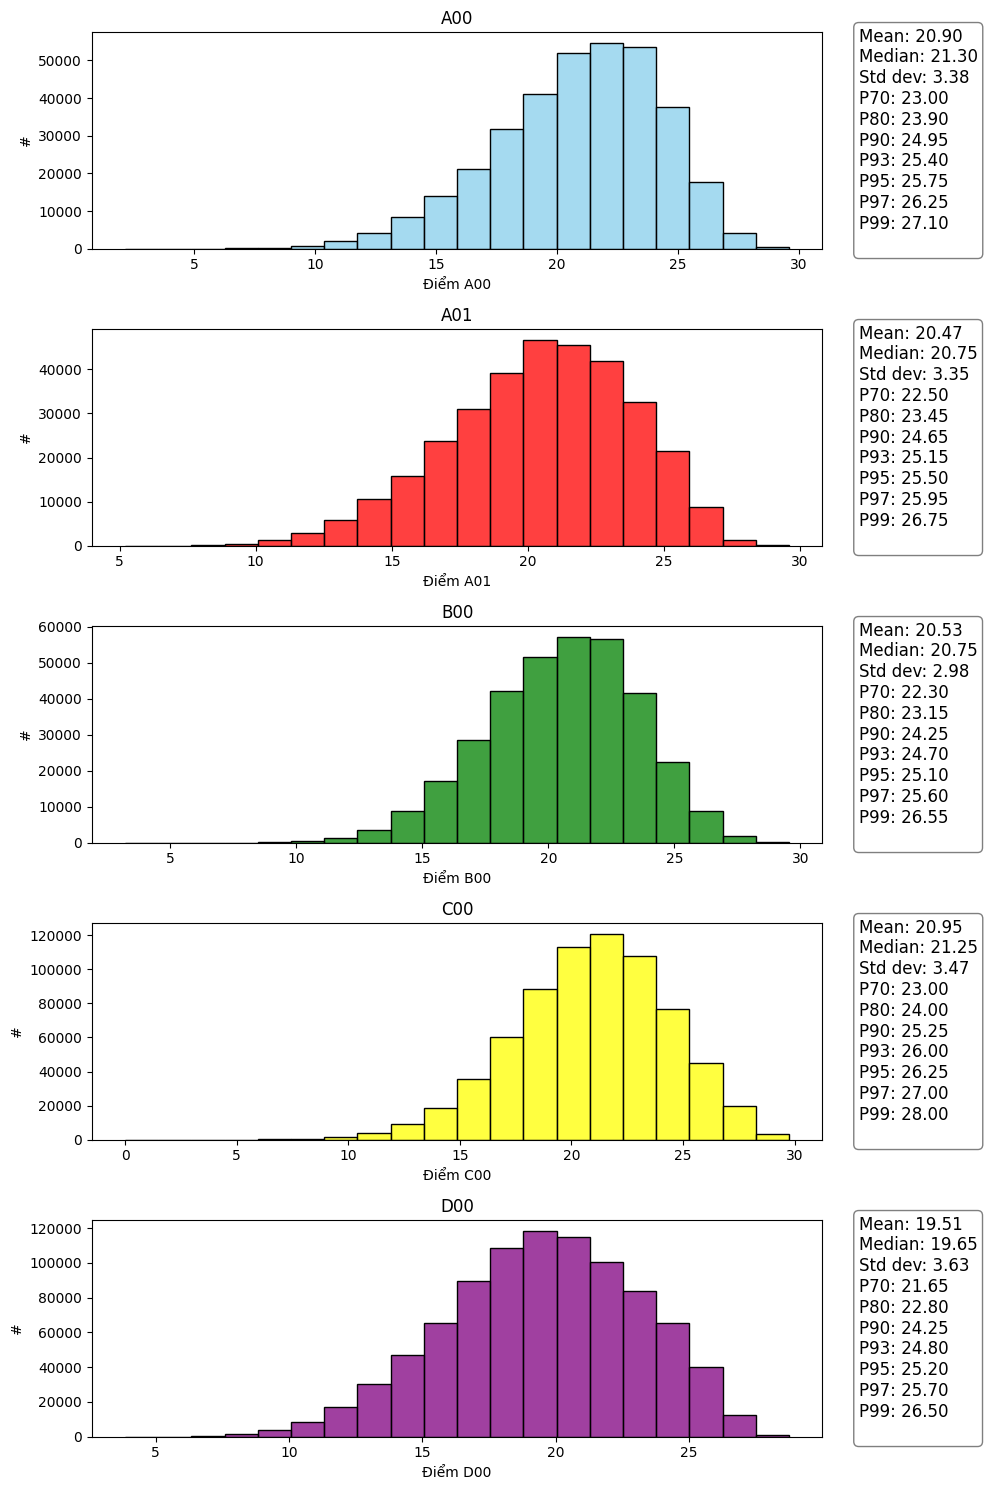

In [127]:
# Tạo cột điểm cho từng tổ hợp môn
df['A00'] = df['toan'] + df['vat_li'] + df['hoa_hoc']
df['A01'] = df['toan'] + df['vat_li'] + df['ngoai_ngu']
df['B00'] = df['toan'] + df['hoa_hoc'] + df['sinh_hoc']
df['C00'] = df['ngu_van'] + df['lich_su'] + df['dia_li']
df['D00'] = df['toan'] + df['ngu_van'] + df['ngoai_ngu']

combinations = ['A00', 'A01', 'B00', 'C00', 'D00']

# Tạo từng histogram cho tất cả các tổ hợp môn và Hiện thị thông tin thống kê trên biểu đồ
fig, ax = plt.subplots(5, 1, figsize=(10, 15))
ax = ax.ravel()

for i in range(5):
    
      sns.histplot(df[combinations[i]].dropna(), kde=False, ax=ax[i], edgecolor='black', color=colors[i], bins=20)
      ax[i].set_title(combinations[i])
      ax[i].set_xlabel(f'Điểm {combinations[i]}')
      ax[i].set_ylabel('#')
  
      data = df[combinations[i]].dropna()
      mean = data.mean()
      median = data.median()
      std_dev = data.std()
  
      p70 = data.quantile(0.7)
      p80 = data.quantile(0.8)
      p90 = data.quantile(0.9)
      p93 = data.quantile(0.93)
      p95 = data.quantile(0.95)
      p97 = data.quantile(0.97)
      p99 = data.quantile(0.99)
  
      textstr = (f'Mean: {mean:.2f}\n'
                f'Median: {median:.2f}\n'
                f'Std dev: {std_dev:.2f}\n'
                f'P70: {p70:.2f}\n'
                f'P80: {p80:.2f}\n'
                f'P90: {p90:.2f}\n'
                f'P93: {p93:.2f}\n'
                f'P95: {p95:.2f}\n'
                f'P97: {p97:.2f}\n'
                f'P99: {p99:.2f}\n')
  
      props = dict(boxstyle='round', facecolor='white', alpha=0.5)
      ax[i].text(1.05, 0.5, textstr, transform=ax[i].transAxes, fontsize=12, verticalalignment='center', horizontalalignment='left', bbox=props)

plt.tight_layout()
plt.show()

  - Tổ hợp D00 có mức điểm trung bình thấp nhất với 19.51, có thể do thí sinh gặp khó khăn với môn Văn.
  - Phổ điểm tổ hợp A00 có độ tập trung cao xung quanh điểm trung bình 20.9. Đa số thí sinh đạt điểm trong khoảng từ 20 đến 25, cho thấy mức độ khó vừa phải và sự phân bổ điểm khá đều.
  - Tổ hợp A01 có phân phối điểm tương tự A00 nhưng có xu hướng lệch nhẹ về bên trái, cho thấy các thí sinh thuộc khối KHTN có thể sẽ gặp khó khăn với môn Anh hơn môn Hóa
  - Tổ hợp B00 phân phối gần chuẩn với điểm trung bình là 20.53, cho thấy độ khó tương đương với A00 và A01.
  - Tổ hợp C00 phân phối điểm chuẩn với điểm trung bình là 20.95, cao hơn một chút so với các tổ hợp khác. Đỉnh phân phối nằm ở mức 19 đến 23 điểm, cho thấy nhiều thí sinh đạt điểm khá cao trong tổ hợp này. Điểm P70 đến P99 có sự phân bố rộng nhất, từ 23.00 đến 28.00, điều này cho thấy có sự phân hóa mạnh ở nhóm thí sinh đạt điểm cao.

# Phân tích tương quan

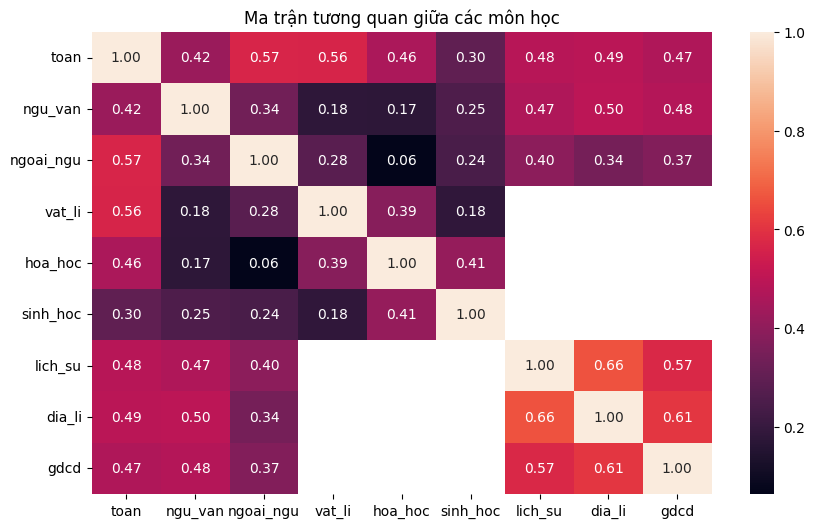

In [128]:
# Lọc các cột
df_filtered = df[['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc', 'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']]

# Tính toán ma trận tương quan
correration_matrix = df_filtered.corr()

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correration_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Ma trận tương quan giữa các môn học')
plt.show()

- Môn Toán có hệ số tương quan cao với môn Ngoại ngữ (0.57). Điều này cho thấy thí sinh có xu hướng đạt điểm cao trong Toán thì cũng có khả năng đạt điểm cao trong Ngoại ngữ.
- Ngữ văn có hệ số tương quan thấp với các môn tự nhiên như Vật lý (0.18) và Hóa học (0.17) phản ánh các thí sinh thi giỏi Văn không đồng nghĩa sẽ giỏi các môn khoa học tự nhiên.
- Các môn thuộc KHXH như Lịch sử, Địa lý và GDCD có hệ số tương quan cao với nhau, đặc biệt Lịch sử và Địa lý có hệ số tương quan là 0.66 thể hiện mối liên hệ khá mạnh giữa khả năng học các môn KHXH của các thí sinh
- Môn Toán có mối tương quan tương đối với Vật lý (0.56) và Hóa học (0.46). Điều này hợp lý vì các môn KHTN thường yêu cầu kỹ năng tư duy logic và tính toán, vốn là thế mạnh của những học sinh giỏi Toán.

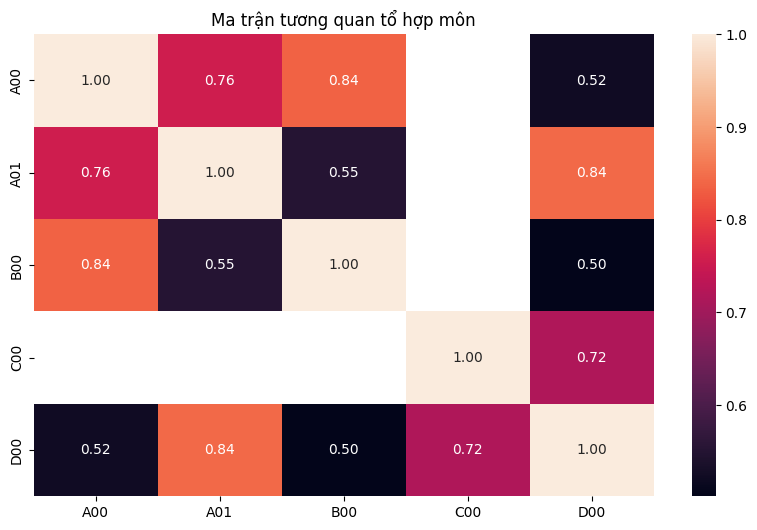

In [129]:
# Lọc các cột theo từng khối
df_filtered_2 = df[['A00', 'A01', 'B00', 'C00', 'D00']]

# Tính toán ma trận tương quan
correration_matrix_2 = df_filtered_2.corr()

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(correration_matrix_2, annot=True, cmap='rocket', fmt='.2f')
plt.title('Ma trận tương quan tổ hợp môn')
plt.show()


- Tổ hợp A00 có mối tương quan khá mạnh đối với các tổ hợp A01 (0.76) và B00 (0.84), điều này dễ hiểu vì các thí sinh học các môn KHTN thường sẽ có khả năng tư duy và học tập tương đồng nhau. Trong khi đó, tổ hợp A00 lại có mức tương quan khá thấp với tổ hợp D00 cho thấy môn Văn vẫn là 1 môn học khá khó khăn đối với các thí sinh thi tổ hợp KHTN
- Tổ hợp C00 có mức độ tương quan khá mạnh đối với tổ hợp D00 cho thấy những học sinh giỏi môn Ngữ văn thường có điểm cao cả trong tổ hợp C00 và D00.Tổ hợp D00 có môn Toán, một môn tự nhiên, trong khi tổ hợp C00 hoàn toàn là các môn xã hội. Mối tương quan cao cho thấy rằng nhiều học sinh có khả năng cân bằng tốt giữa các môn tự nhiên và xã hội, họ có thể đạt điểm cao không chỉ ở môn Văn mà còn ở môn Toán. 

# Phân tích theo vùng

In [130]:
province_regions_df = pd.read_csv('./Data/vnhsge_province_region.csv')
province_regions_df

,province_code,province_name,er_code,region
0,1,Hà Nội,1,Thành phố trực thuộc trung ương
1,2,TP. Hồ Chí Minh,1,Thành phố trực thuộc trung ương
2,3,Hải Phòng,1,Thành phố trực thuộc trung ương
3,4,Đà Nẵng,1,Thành phố trực thuộc trung ương
4,55,Cần Thơ,1,Thành phố trực thuộc trung ương
...,...,...,...,...
58,58,Trà Vinh,7,Đồng bằng sông Cửu Long
59,59,Sóc Trăng,7,Đồng bằng sông Cửu Long
60,60,Bạc Liêu,7,Đồng bằng sông Cửu Long
61,61,Cà Mau,7,Đồng bằng sông Cửu Long


In [131]:
# Lấy 2 số đầu tiên của sbd để xác định mã tỉnh thành
df['province_code'] = df['sbd'].astype(str).str[:2].astype(int)

In [132]:
# Merge dataframe tỉnh thành vào dataframe điểm thi
df = pd.merge(df, province_regions_df, on='province_code')
df

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,A00,A01,B00,C00,D00,province_code,province_name,er_code,region
0,01000001,8.4,6.75,8.0,6.00,5.25,5.0,NaN,NaN,NaN,N1,19.65,22.40,18.65,NaN,23.15,1,Hà Nội,1,Thành phố trực thuộc trung ương
1,01000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1,NaN,NaN,NaN,21.75,24.30,1,Hà Nội,1,Thành phố trực thuộc trung ương
2,01000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1,NaN,NaN,NaN,23.25,25.15,1,Hà Nội,1,Thành phố trực thuộc trung ương
3,01000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1,NaN,NaN,NaN,21.50,20.70,1,Hà Nội,1,Thành phố trực thuộc trung ương
4,01000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1,NaN,NaN,NaN,26.75,25.40,1,Hà Nội,1,Thành phố trực thuộc trung ương
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061600,64007282,4.2,6.00,3.0,NaN,NaN,NaN,5.25,6.25,7.50,N1,NaN,NaN,NaN,17.50,13.20,64,Hậu Giang,7,Đồng bằng sông Cửu Long
1061601,64007283,5.2,6.00,3.6,NaN,NaN,NaN,6.25,5.75,7.75,N1,NaN,NaN,NaN,18.00,14.80,64,Hậu Giang,7,Đồng bằng sông Cửu Long
1061602,64007284,7.2,8.00,7.0,6.25,7.00,8.0,NaN,NaN,NaN,N1,20.45,20.45,22.20,NaN,22.20,64,Hậu Giang,7,Đồng bằng sông Cửu Long
1061603,64007285,5.2,5.25,4.4,NaN,NaN,NaN,4.75,6.50,8.75,N1,NaN,NaN,NaN,16.50,14.85,64,Hậu Giang,7,Đồng bằng sông Cửu Long


C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3734242746.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_province_count, palette='rocket')


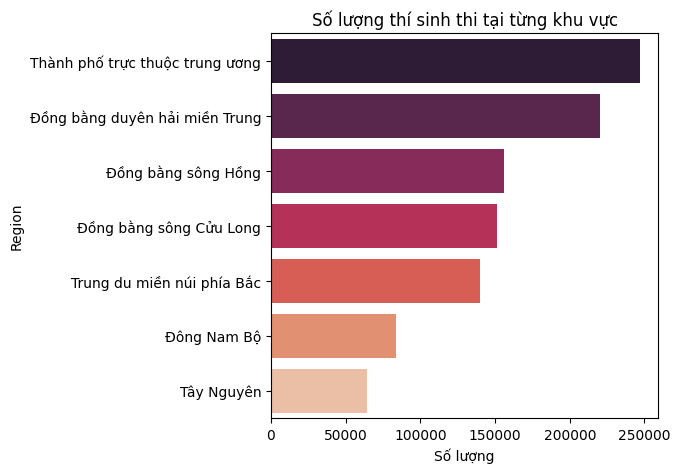

In [141]:
# Tính toán số lượng thí sinh thi tại từng tỉnh thành
df_province_count = df['region'].value_counts().reset_index()

# Đổi tên các cột
df_province_count.columns = ['region', 'count']

# Vẽ biểu đồ cột số lượng thí sinh thi tại từng tỉnh thành
plt.figure(figsize=(5, 5))
sns.barplot(x='count', y='region', data=df_province_count, palette='rocket')
plt.title('Số lượng thí sinh thi tại từng khu vực')
plt.xlabel('Số lượng')
plt.ylabel('Region')
plt.show()


- Các thành phố trực thuộc trung ương có số lượng thí sinh cao nhất, với hơn 250.000 thí sinh. Điều này có thể phản ánh mật độ dân số cao và sự tập trung của các cơ sở giáo dục tại các thành phố lớn như Hà Nội, TP.HCM, Đà Nẵng, Hải Phòng, và Cần Thơ.
- Khu vực Tây Nguyên có số lượng thí sinh thấp nhất, chỉ hơn 50.000 thí sinh. Điều này có thể do dân số thấp hơn và cơ hội tiếp cận giáo dục ở khu vực này còn hạn chế so với các thành phố lớn.
  
  => Kết quả này cũng có thể gợi ý về sự cần thiết của việc đầu tư và phát triển giáo dục ở các khu vực như Tây Nguyên để nâng cao cơ hội học tập và giảm bớt sự chênh lệch với các thành phố lớn.

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


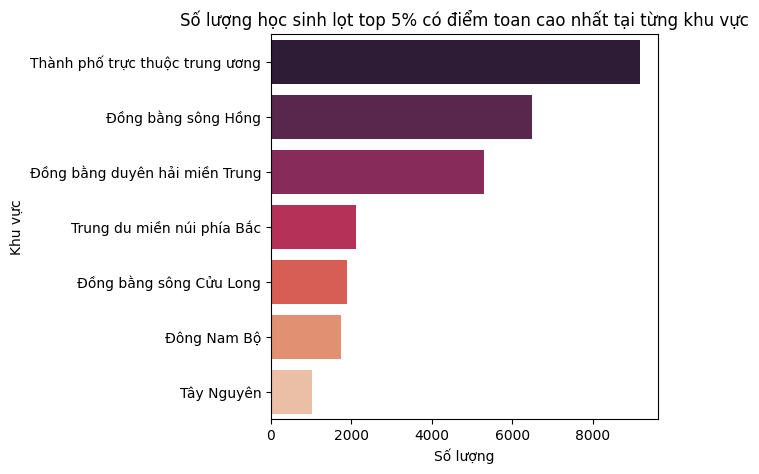

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


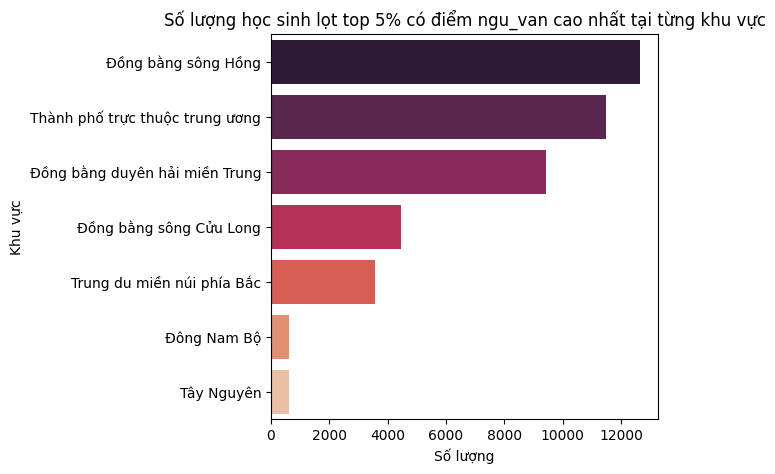

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


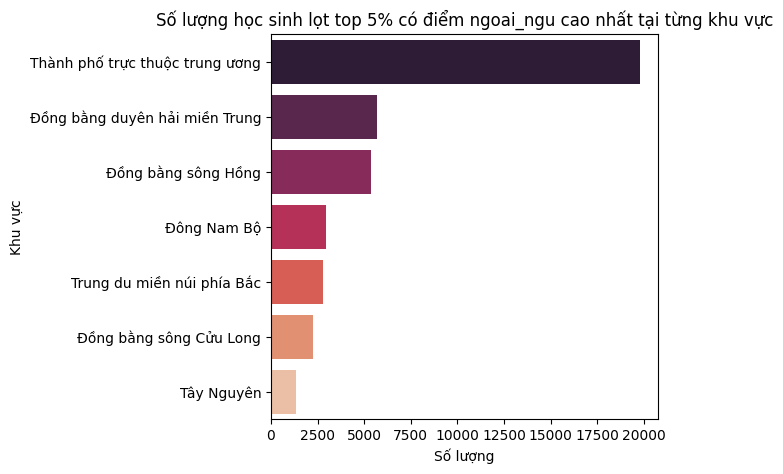

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


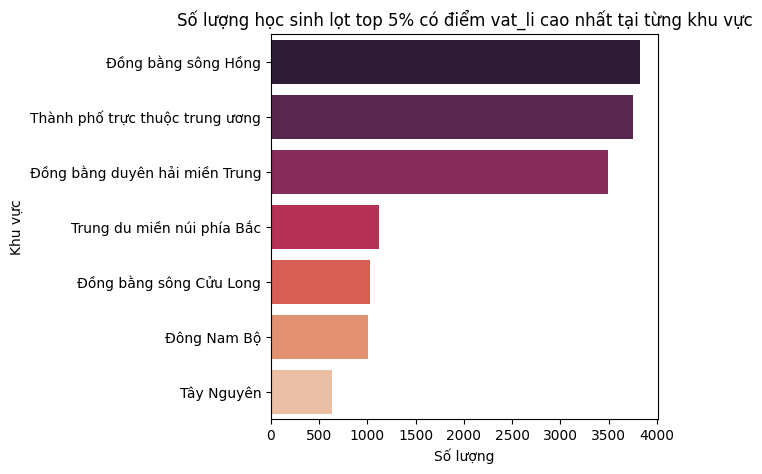

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


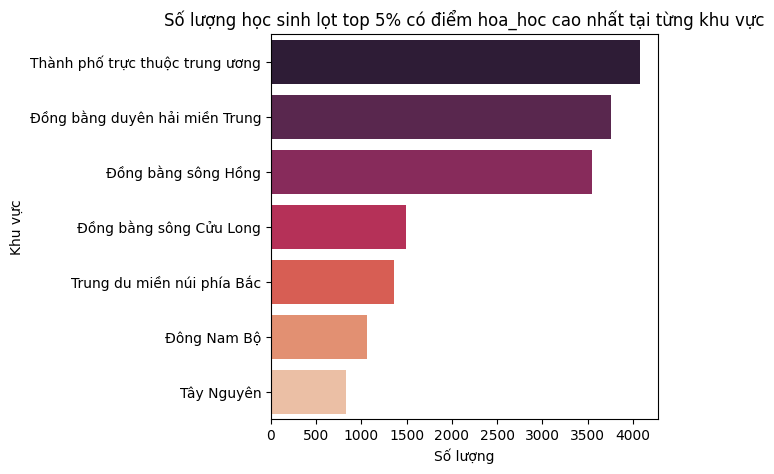

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


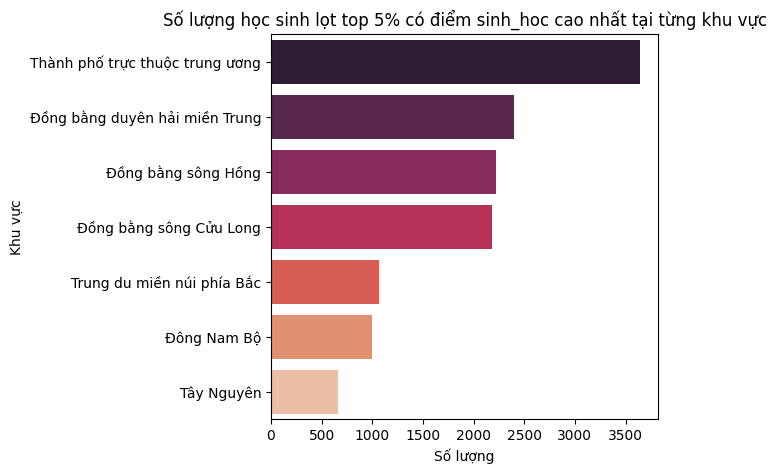

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


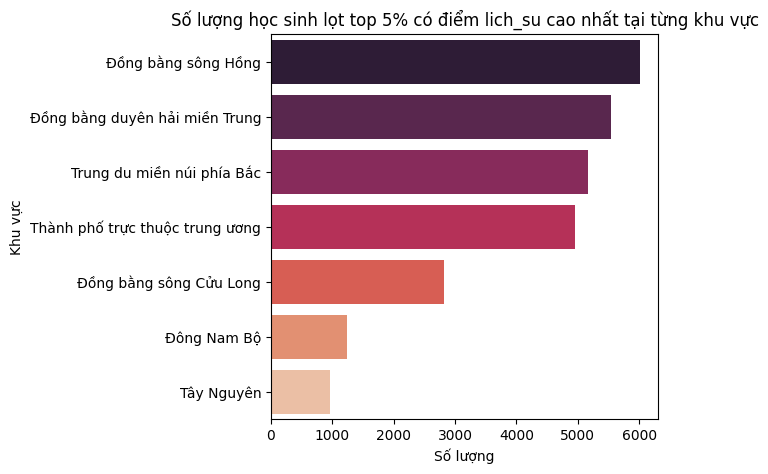

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


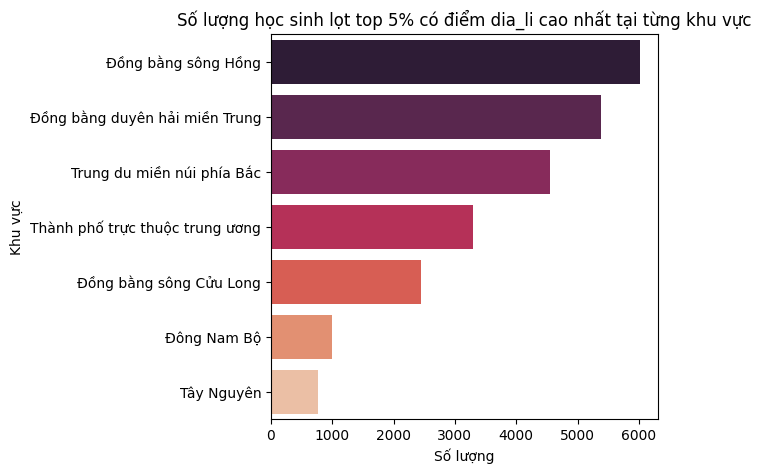

C:\Users\PC\AppData\Local\Temp\ipykernel_22752\3088426592.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')


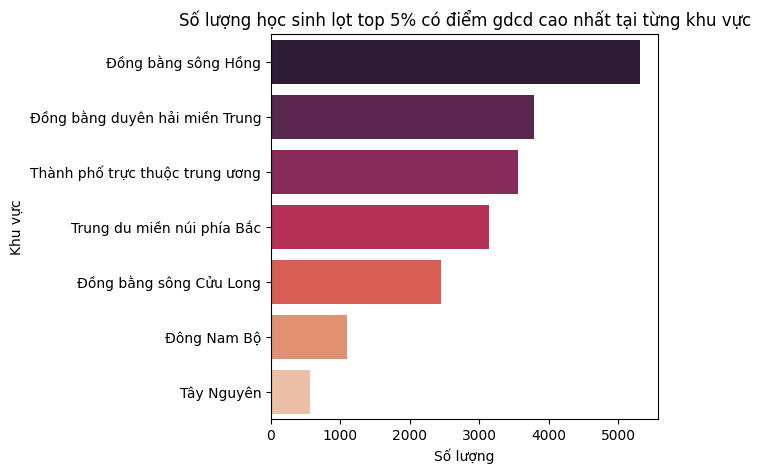

In [140]:
# Tính số lượng học sinh của từng môn lọt top 5% tại từng tỉnh thành và vẽ biểu đồ cho từng môn học
for subject in subjects:
    percentile_95 = df[subject].quantile(0.95)
    df_top_5 = df[df[subject] > percentile_95]
    df_top_5_province = df_top_5['region'].value_counts().reset_index()
    df_top_5_province.columns = ['region', 'count']
    plt.figure(figsize=(5, 5))
    sns.barplot(x='count', y='region', data=df_top_5_province, palette='rocket')
    plt.title(f'Số lượng học sinh lọt top 5% có điểm {subject} cao nhất tại từng khu vực')
    plt.xlabel('Số lượng')
    plt.ylabel('Khu vực')
    plt.show()

- Thành phố trực thuộc Trung ương chiếm ưu thế trong các môn Toán, Ngoại ngữ, Hóa học, và Sinh học, với số lượng thí sinh đạt điểm cao nhất vượt trội.
- Đồng bằng sông Hồng nổi bật trong các môn Ngữ văn, Vật lý, Lịch sử, Địa lý, và GDCD, cho thấy sự mạnh mẽ trong các môn xã hội và một số môn khoa học tự nhiên.